<a href="https://colab.research.google.com/github/vincimech010233/MachineLearningBasics/blob/master/California_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn


In [2]:
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing()
X, y = housing_data.data, housing_data.target


In [3]:
print(housing_data.DESCR)  # Descripción del dataset
print(housing_data.feature_names)  # Nombres de las características


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

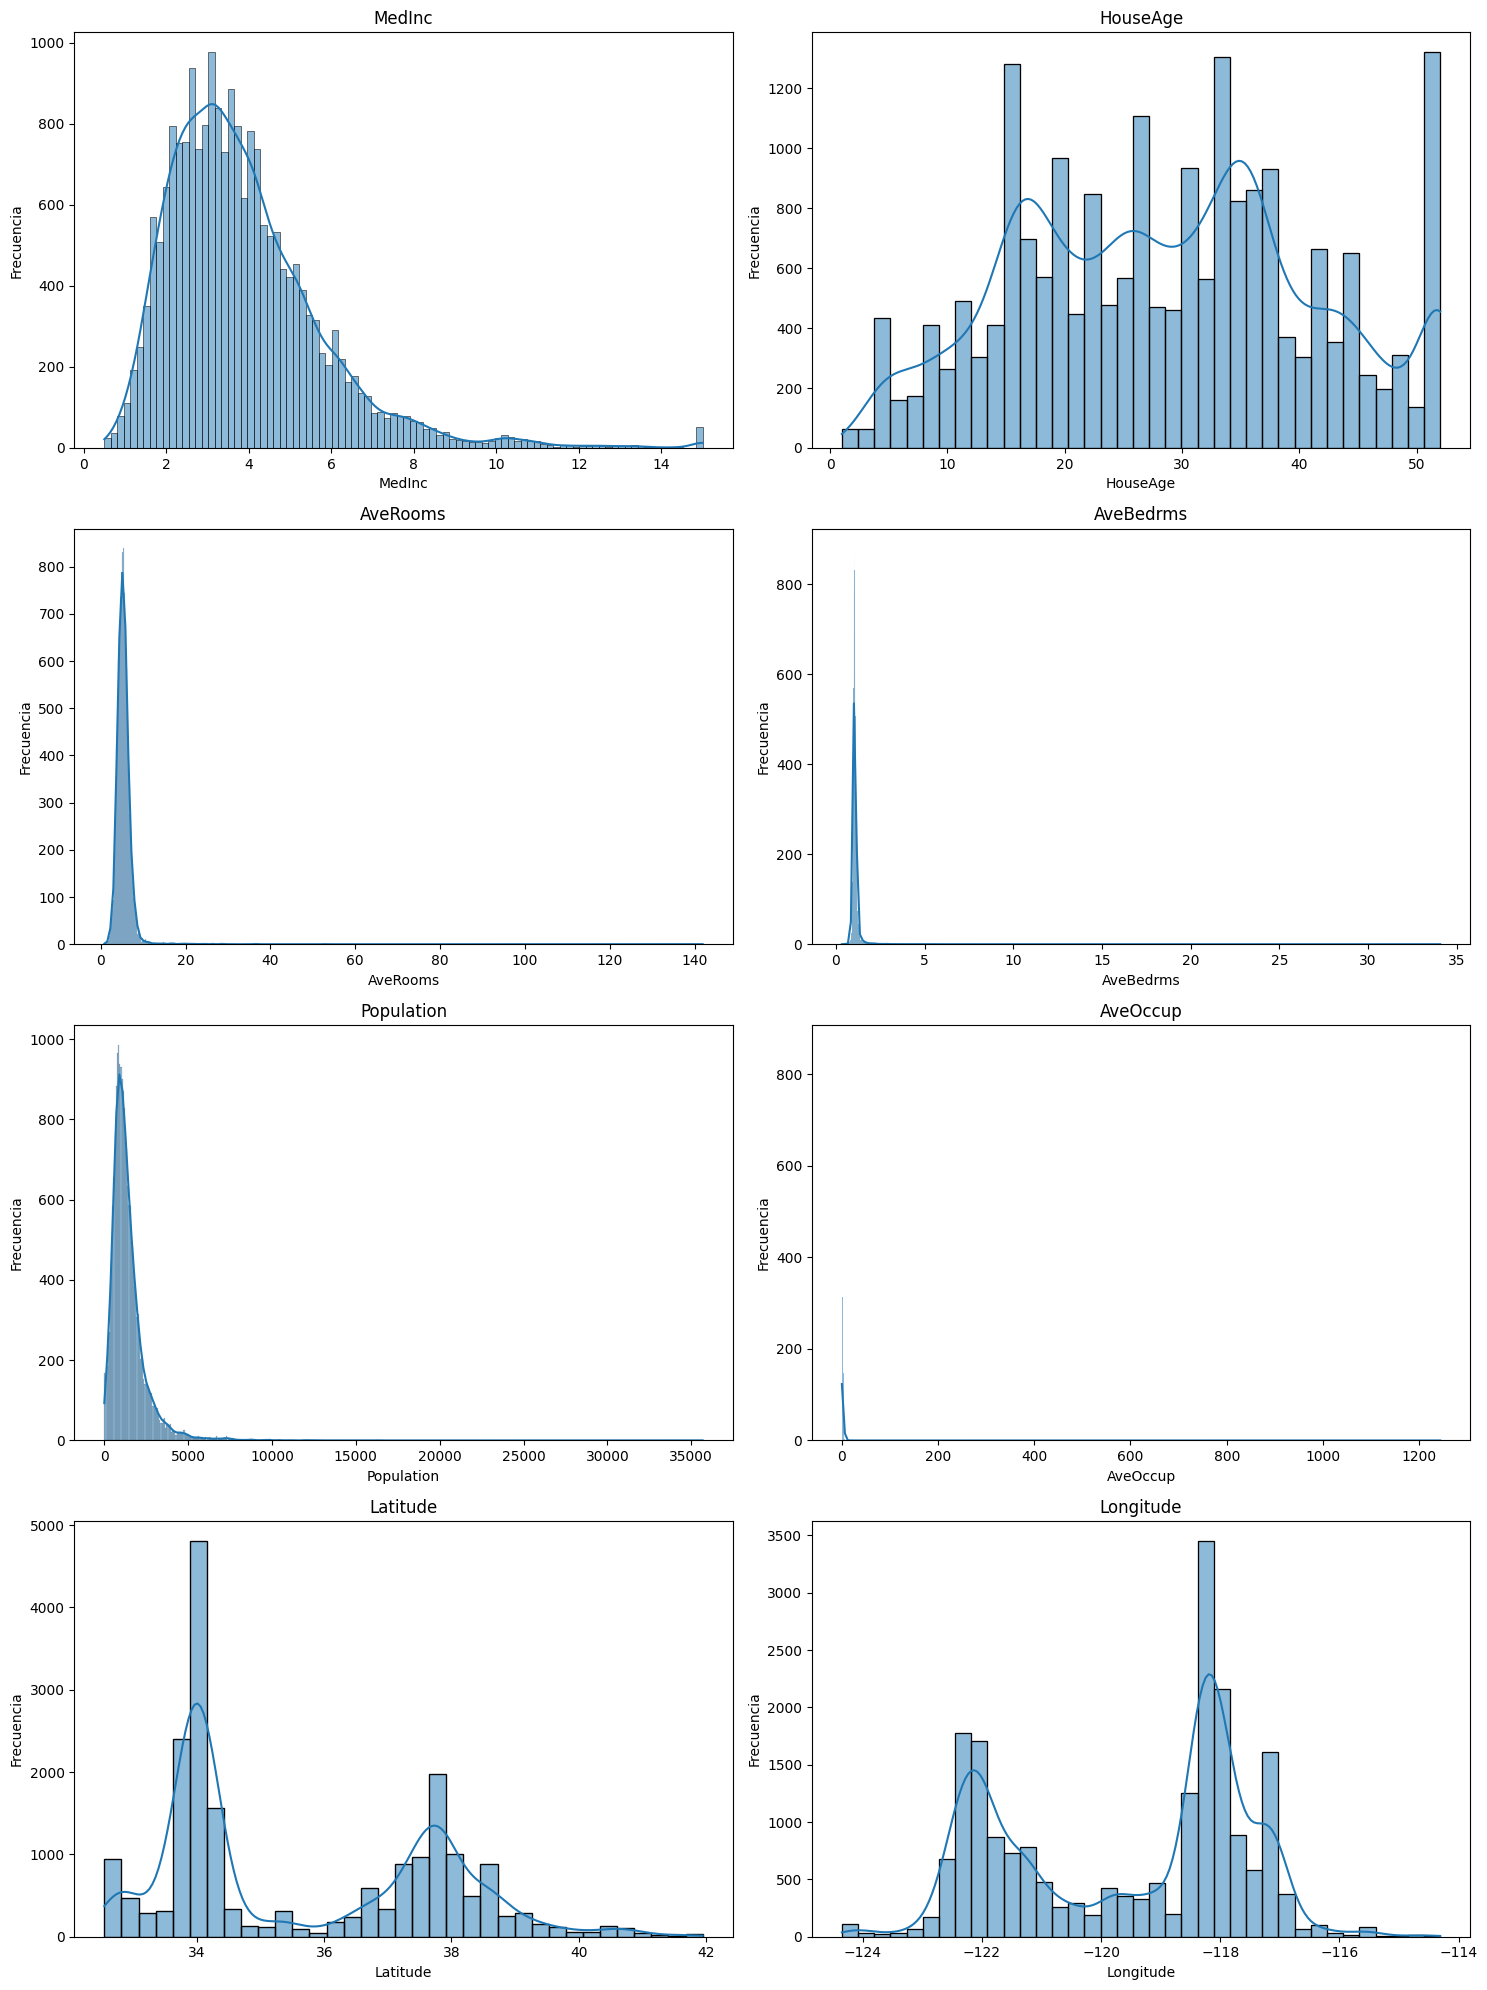

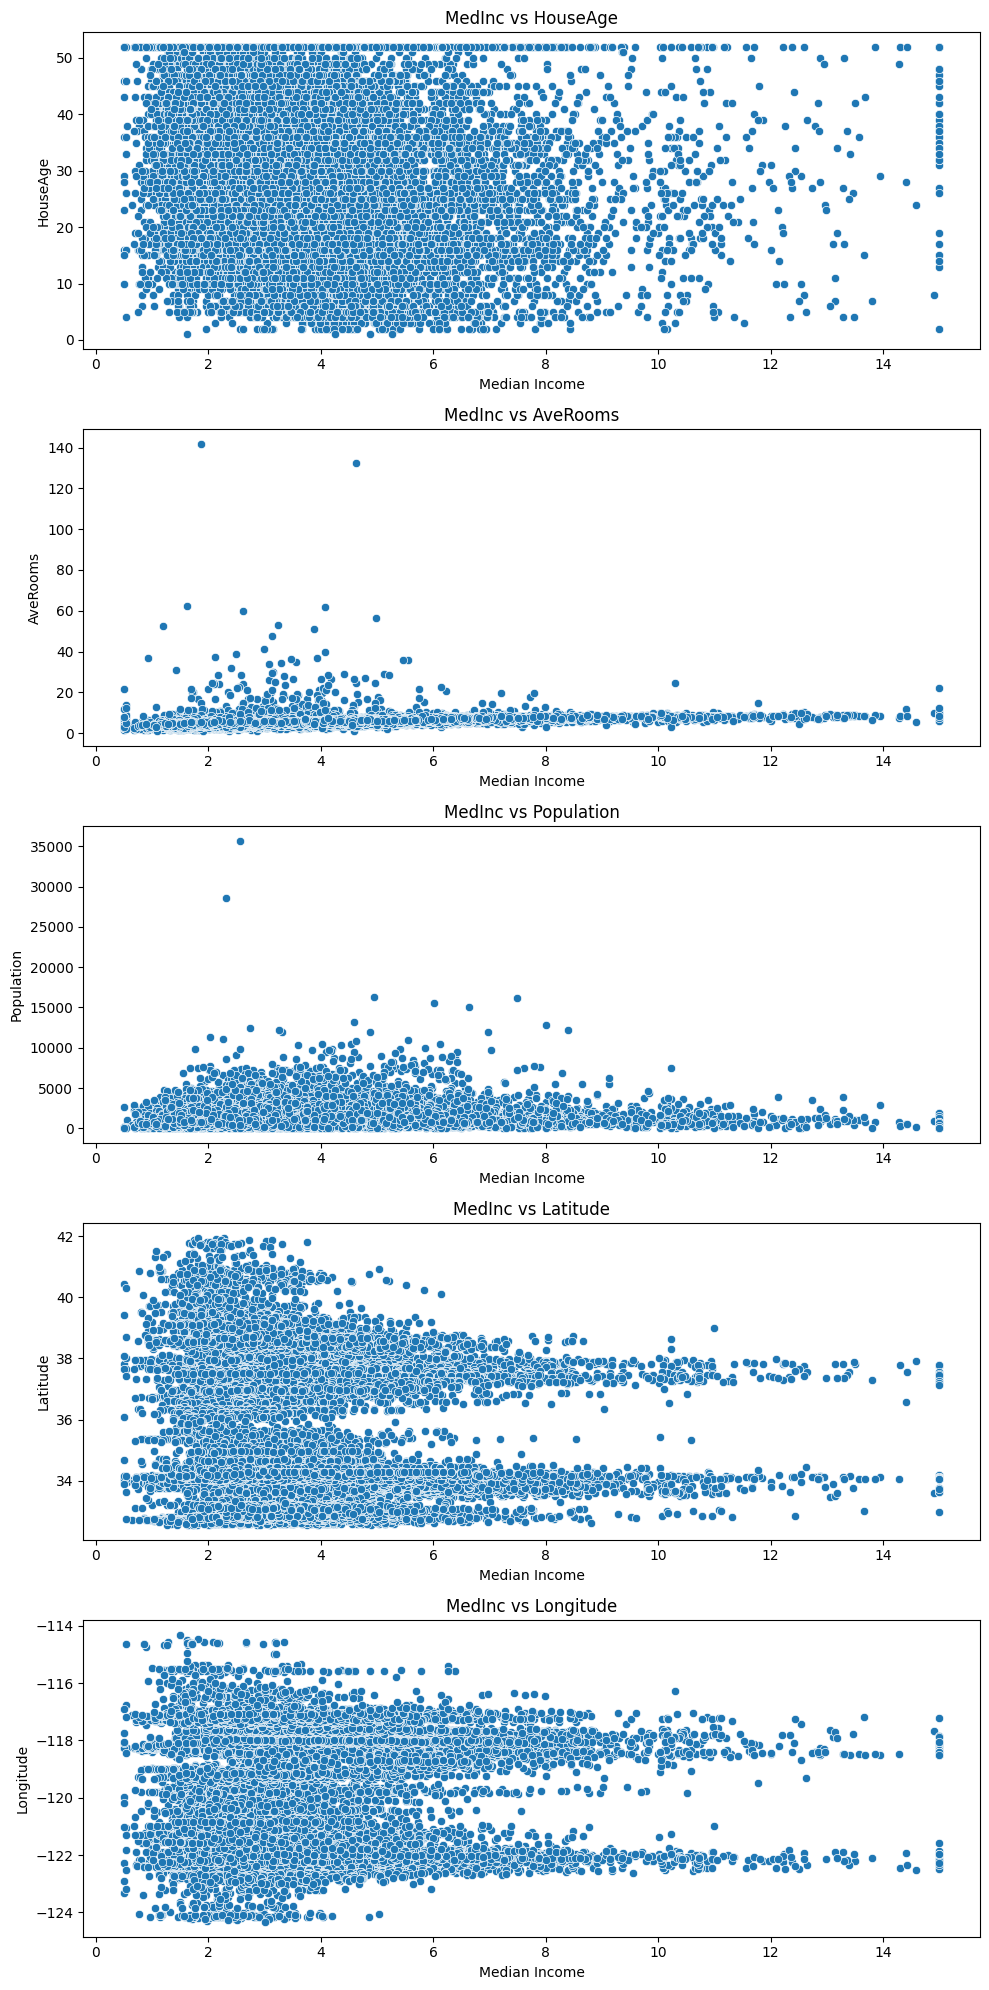

In [5]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargando el dataset de California Housing
housing_data = fetch_california_housing()
X = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)

# Visualizando las distribuciones de cada característica
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axs = axs.flatten()

for i, col in enumerate(X.columns):
    sns.histplot(X[col], kde=True, ax=axs[i])
    axs[i].set_title(col)
    axs[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Visualizando las relaciones entre algunas características y los ingresos medios
features_to_plot = ['HouseAge', 'AveRooms', 'Population', 'Latitude', 'Longitude']
fig, axs = plt.subplots(nrows=len(features_to_plot), figsize=(10, 20))

for i, col in enumerate(features_to_plot):
    sns.scatterplot(x='MedInc', y=col, data=X, ax=axs[i])
    axs[i].set_title(f'MedInc vs {col}')
    axs[i].set_xlabel('Median Income')
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()


In [6]:
# Comprobando si hay valores faltantes en el dataset
missing_values = X.isnull().sum()
print("Valores faltantes por característica:")
print(missing_values)

# Rellenando los valores faltantes, si los hay
if missing_values.sum() > 0:
    X.fillna(X.median(), inplace=True)
    print("Valores faltantes rellenados con la mediana.")

Valores faltantes por característica:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


In [7]:
# Añadiendo características adicionales

# Proporción de Habitaciones por Hogar
X['RoomsPerHousehold'] = X['AveRooms'] / X['AveOccup']

# Proporción de Dormitorios respecto a Habitaciones
X['BedroomsPerRoom'] = X['AveBedrms'] / X['AveRooms']

# Población por Hogar
X['PopulationPerHousehold'] = X['Population'] / X['AveOccup']

# Categorización de la Edad de las Casas
X['HouseAgeCategory'] = X['HouseAge'].apply(lambda x: 'new' if x <= X['HouseAge'].median() else 'old')

# Interacciones Geográficas
X['Location'] = X['Latitude'] * X['Longitude']

In [8]:
# Muestra de las primeras filas con las nuevas características
print(X.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  RoomsPerHousehold  BedroomsPerRoom  PopulationPerHousehold  \
0    -122.23           2.732919         0.146591                   126.0   
1    -122.22           2.956685         0.155797                  1138.0   
2    -122.24           2.957661         0.129516                   177.0   
3    -122.25           2.283154         0.184458                   219.0   
4    -122.25           2.879646         0.172096                   259.0   

  HouseAgeCategory   Location  
0              old -4630.0724  
1              new -46

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, housing_data.target, test_size=0.2, random_state=42)

# Preprocesamiento: Escalado de características numéricas y codificación de variables categóricas
num_attribs = list(X_train.select_dtypes(include=[np.number]))
cat_attribs = ['HouseAgeCategory']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

# Creación del Pipeline de ML
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entrenamiento del modelo
model.fit(X_train, y_train)

# Evaluación del modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.452918083401833


Random Forest MSE: 0.25264184811632984


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Mejor conjunto de parámetros: {'regressor__max_depth': None, 'regressor__max_features': 'sqrt', 'regressor__n_estimators': 200}
MSE de validación cruzada: 0.45437505859971716


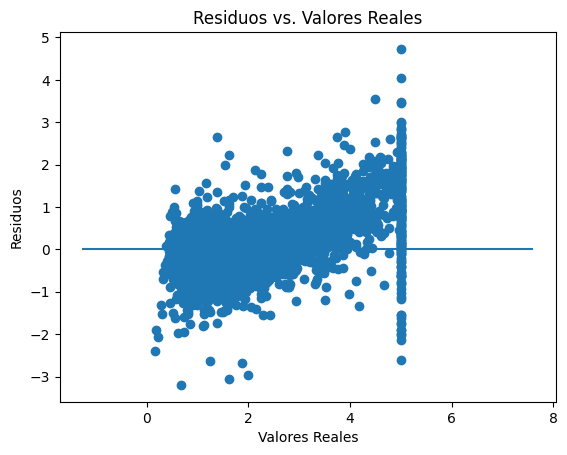

In [15]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
import numpy as np

# Prueba con un modelo diferente, RandomForestRegressor
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, max_features=1.0))
])
rf_model.fit(X_train, y_train)
rf_mse = mean_squared_error(y_test, rf_model.predict(X_test))
print("Random Forest MSE:", rf_mse)

# Ajuste de hiperparámetros con GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_features': ['auto', 'sqrt'],
    'regressor__max_depth': [10, 20, None]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Mejor conjunto de parámetros:", grid_search.best_params_)

# Validación cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("MSE de validación cruzada:", -cv_scores.mean())

# Análisis de residuos
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Visualización de residuos
plt.scatter(y_test, residuals)
plt.hlines(y = 0, xmin = y_pred.min(), xmax = y_pred.max())
plt.title('Residuos vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Residuos')
plt.show()
